In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

### Load scalability data

In [2]:
project_path = os.path.dirname(os.getcwd())
project_path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO'

In [3]:
backup = project_path + '\\backup\\wfa_scalability.pkl'
print(backup)

with open(backup, 'rb') as file:
    scalability = pickle.load(file)
scalability

c:\Users\pierp\OneDrive\Desktop\Optimization Models\Python exercises\DSSC_MO\backup\wfa_scalability.pkl


[[5, 4, 2, 0, 0.046797399991191924, 35.60155600000871],
 [5, 5, 2, 0, 0.07558180001797155, 411.9953643999761],
 [5, 6, 2, 0, 0.06144620000850409, 965.873802600021]]

In [4]:
columns = ['fields', 'storages', 'vehicles', 'iter', 'build_time', 'opt_time']
df_scalability = pd.DataFrame(scalability, columns=columns)
df_scalability = df_scalability.sort_values(by=['fields', 'storages'], ascending=[True, True])  
df_scalability

,fields,storages,vehicles,iter,build_time,opt_time
0,5,4,2,0,0.046797,35.601556
1,5,5,2,0,0.075582,411.995364
2,5,6,2,0,0.061446,965.873803


Some iterations seem blocked or return an optimization runtime which is way far from the other iterations for the same set of [n. fields, n. storages, n. vehichels]; these runs are outiliers and they will not considered for the scalabiltiy analisys.

In [5]:
# df_scalability = df_scalability.drop([30, 31, 37]) # remove outliers

###  Group iterations 

group by: 'fields', 'storages' and 'vehicles' and compute mean and standard deviation

In [6]:
df = df_scalability.groupby(['fields', 'storages', 'vehicles'], group_keys=True).agg({'build_time':['mean','std'], 'opt_time':['mean', 'std']})
print(df)

                         build_time        opt_time    
                               mean std        mean std
fields storages vehicles                               
5      4        2          0.046797 NaN   35.601556 NaN
       5        2          0.075582 NaN  411.995364 NaN
       6        2          0.061446 NaN  965.873803 NaN


### Produce Visualization

In [7]:
path = project_path + '\\images\\'
foot = '5_fields_'

In [8]:
path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO\\images\\'

##### Plot Buid runtime

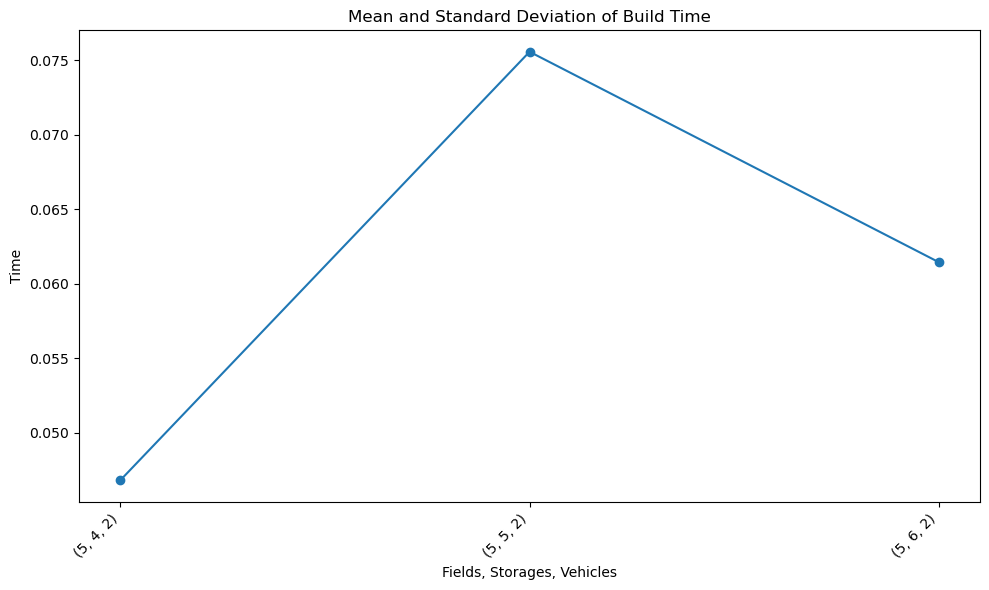

In [9]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot build_time
df['build_time']['mean'].plot(ax=ax, marker='o', label='build_time mean')
ax.fill_between(
    range(len(df)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Build Time')

plt.savefig(path + f'{foot}build_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Optimiaziotion runtime

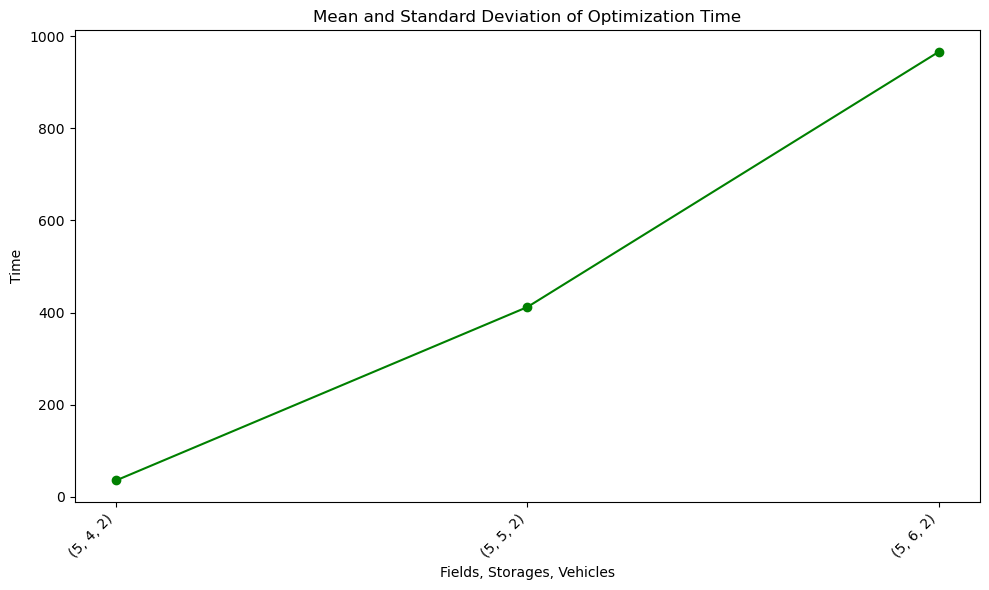

In [10]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Optimization Time')

plt.savefig(path + f'{foot}opt_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization)

In [11]:
# Group by the first level of the multi-index and sum
tot_time = {
 'mean_time': df.loc[:,'build_time']['mean'] + df.loc[:,'opt_time']['mean'],
 'std_time': df.loc[:,'build_time']['std'] + df.loc[:,'opt_time']['std']
}

tot_time = pd.DataFrame(tot_time)
print(tot_time) 

                           mean_time  std_time
fields storages vehicles                      
5      4        2          35.648353       NaN
       5        2         412.070946       NaN
       6        2         965.935249       NaN


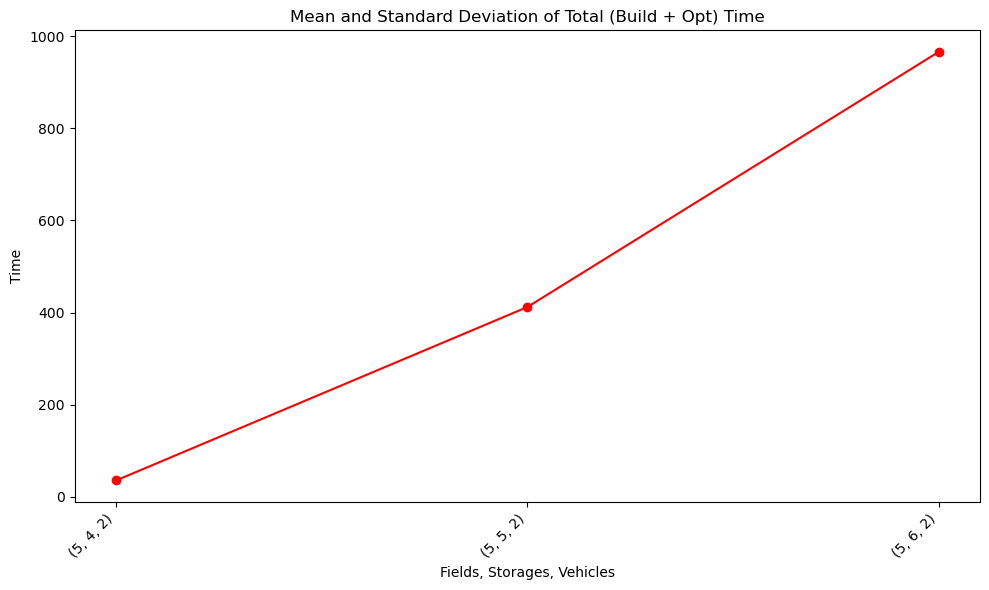

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total (Build + Opt) Time')

plt.tight_layout()
plt.savefig(path + f'{foot}total_time.svg', format='svg')
plt.show()

##### Plot Total runtime (Build + Optimization) & only Optimization runtime

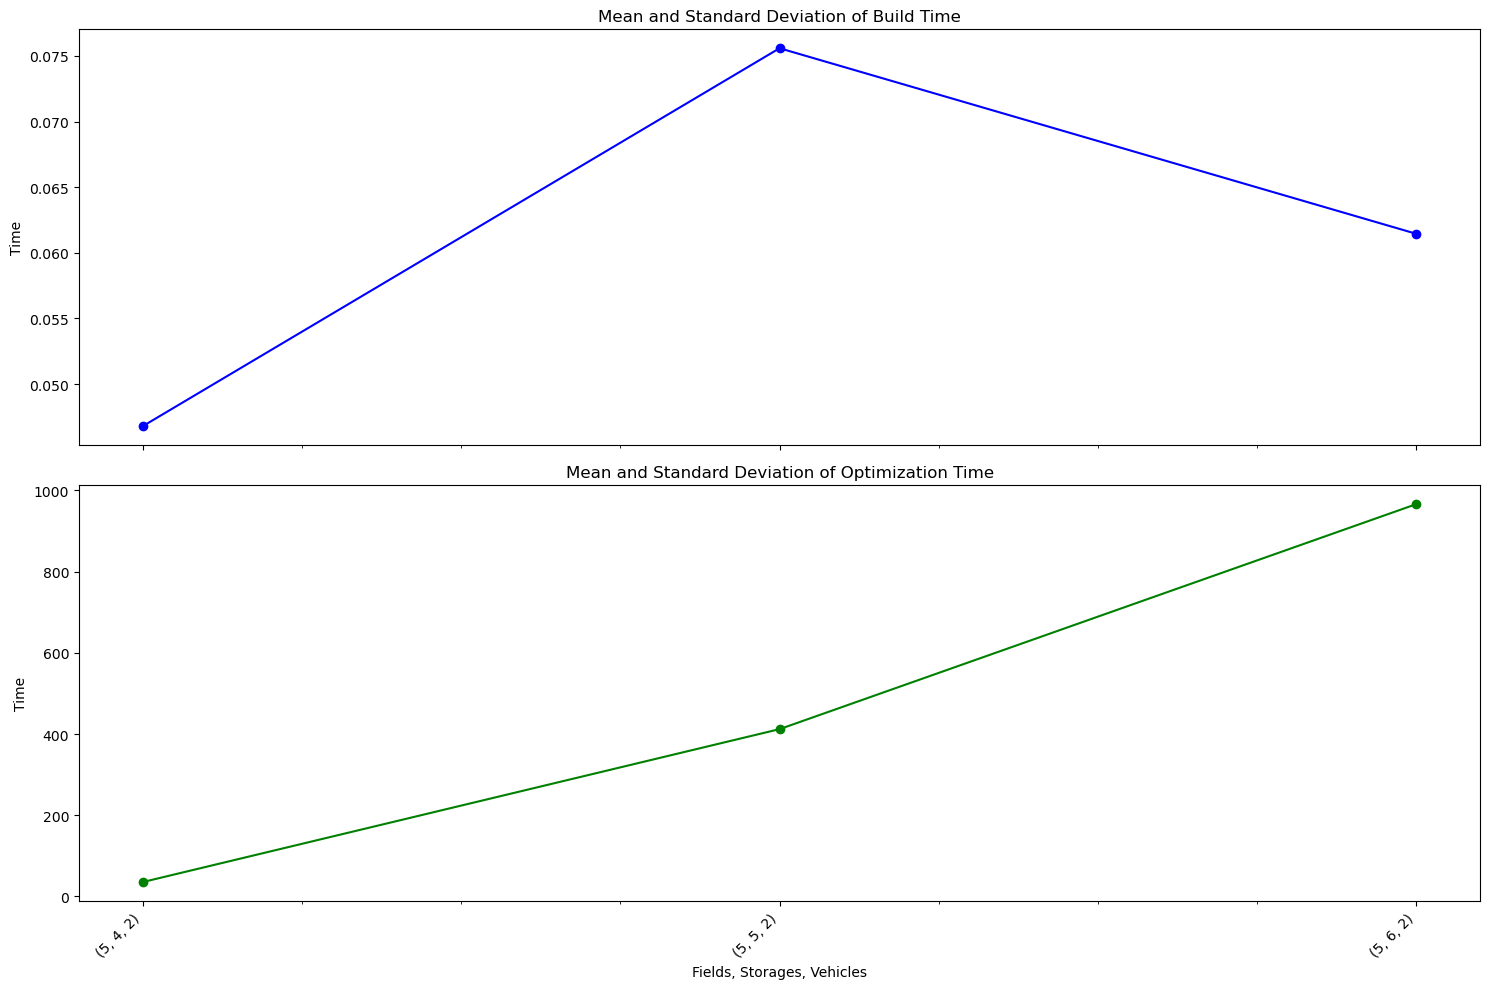

In [13]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot build_time
df['build_time']['mean'].plot(ax=ax1, marker='o', label='build mean time', color='blue')
ax1.fill_between(
    range(len(tot_time)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2,
    color='blue'
)

ax1.set_xticks(range(len(df['build_time'])))
ax1.set_xticklabels(df['build_time'].index.tolist(), rotation=45, ha='right')

ax1.set_title('Mean and Standard Deviation of Build Time')
ax1.set_ylabel('Time')
ax1.set_xlabel('Fields, Storages, Vehicles')

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax2, marker='o', label='opt mean time', color='green')
ax2.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

ax2.set_xticks(range(len(df['opt_time'])))
ax2.set_xticklabels(df['opt_time'].index.tolist(), rotation=45, ha='right')

ax2.set_title('Mean and Standard Deviation of Optimization Time')
ax2.set_ylabel('Time')
ax2.set_xlabel('Fields, Storages, Vehicles')


plt.savefig(path + f'{foot}total_and_opt_time.svg', format='svg')
plt.tight_layout()
plt.show()